<a href="https://colab.research.google.com/github/Magnusrm/TDAT3025-Machine-Learning/blob/master/Task1.2/oppg_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

W1 = [[-10.229952]], W2 = [[-10.229952]], b = [[15.5142145]], loss = [[1.8292043e-07]
 [5.0579566e-03]
 [5.0579566e-03]
 [7.0888246e-03]]


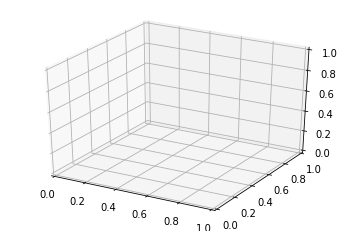

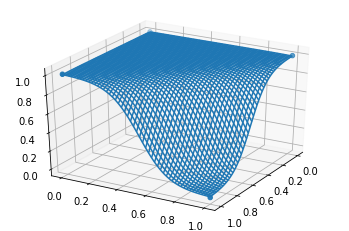

In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


x1_train = np.mat([[0], [1], [0], [1]])
x2_train = np.mat([[0], [0], [1], [1]])
y_train = np.mat([[1], [1], [1], [0]])

class SigmoidModel:
    def __init__(self):

        self.x1 = tf.placeholder(tf.float32)
        self.x2 = tf.placeholder(tf.float32)
        self.y = tf.placeholder(tf.float32)

        self.W1 = tf.Variable([[0.0]])
        self.W2 = tf.Variable([[0.0]])
        self.b = tf.Variable([[0.0]])

        self.logits = tf.matmul(self.x1, self.W1) + tf.matmul(self.x2, self.W2) + self.b

        self.loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=self.y, logits=self.logits)
        
model = SigmoidModel()

minimize_operation = tf.train.GradientDescentOptimizer(1).minimize(model.loss)

session = tf.Session()

session.run(tf.global_variables_initializer())

for epoch in range(1000):
    session.run(minimize_operation, {model.x1: x1_train, model.x2: x2_train, model.y: y_train})

# Evaluate training accuracy
W1, W2, b, loss = session.run([model.W1, model.W2, model.b, model.loss], {model.x1: x1_train, model.x2: x2_train, model.y: y_train})
print("W1 = %s, W2 = %s, b = %s, loss = %s" % (W1, W2, b, loss))

session.close()



fig = plt.figure()
ax = fig.gca(projection='3d')

# Observed/training input and output

x_train_plot = np.mat([[0], [1], [0], [1]])
y_train_plot = np.mat([[0], [0], [1], [1]])
z_train_plot = np.mat([[1], [1], [1], [0]])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# ax.plot(x_train_plot, y_train_plot, z_train_plot, 'o', label='$(\\hat x^{(i)},\\hat y^{(i)})$')
ax.scatter(x_train_plot, y_train_plot, z_train_plot, marker='o', label='$y = f(x, z) = xW1 + zW2 + b$')


class LinearRegressionModel:
    def __init__(self, W1, W2, b):
        self.W1 = W1
        self.W2 = W2
        self.b = b

    # Predictor
    def f(self, x, y):
        res = self.g(x * self.W1 + y * self.W2 + self.b)
        return res

    def g(self, z):
        return 1 / (1 + np.exp(-z))


'''
    # Predictor
    def f(self, x, y):
        return x * self.W1 + y * self.W2 + self.b
'''

model1 = LinearRegressionModel(W1,W2, b)

x1_test = np.arange(0, 1, 0.001)
x2_test = np.arange(0, 1, 0.001)
x1_test, x2_test = np.meshgrid(x1_test, x2_test)
z_test = model1.f(x1_test, x2_test)

#model1 = LinearRegressionModel(np.mat(W1),np.mat(W2),np.mat(b))
'''
x_surface1 = [[np.min(x_train1)], [np.min(x_train1)], [np.max(x_train1)], [np.max(x_train1)]]
x_surface2 = [[np.min(x_train2)], [np.min(x_train2)], [np.max(x_train2)], [np.max(x_train2)]]
x_surface1, x_surface2 = np.meshgrid(x_surface1, x_surface2)
z_surface = model1.f(x_surface1, x_surface2)
'''
ax.plot_wireframe(x1_test, x2_test, z_test)
ax.view_init(30, 30)
plt.show()
#print(x_surface, y_surface, z_surface)

#ax.plot_surface(x_surface1, x_surface2, z_surface, alpha=0.3, color='blue')